In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import plot_tree
from sklearn import tree

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
x=data.drop('quality',axis=1)
y=data['quality']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
print(f'Accuracy:{accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}')
print(f'Classification Report:\n{classification_report(y_test,y_pred)}')

Accuracy:0.5604166666666667
Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   1  10   5   1   0]
 [  2   6 126  56   4   1]
 [  0   4  53 111  30   2]
 [  0   1   5  24  30   1]
 [  0   0   0   4   1   1]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.08      0.06      0.07        17
           5       0.65      0.65      0.65       195
           6       0.56      0.56      0.56       200
           7       0.45      0.49      0.47        61
           8       0.20      0.17      0.18         6

    accuracy                           0.56       480
   macro avg       0.32      0.32      0.32       480
weighted avg       0.56      0.56      0.56       480



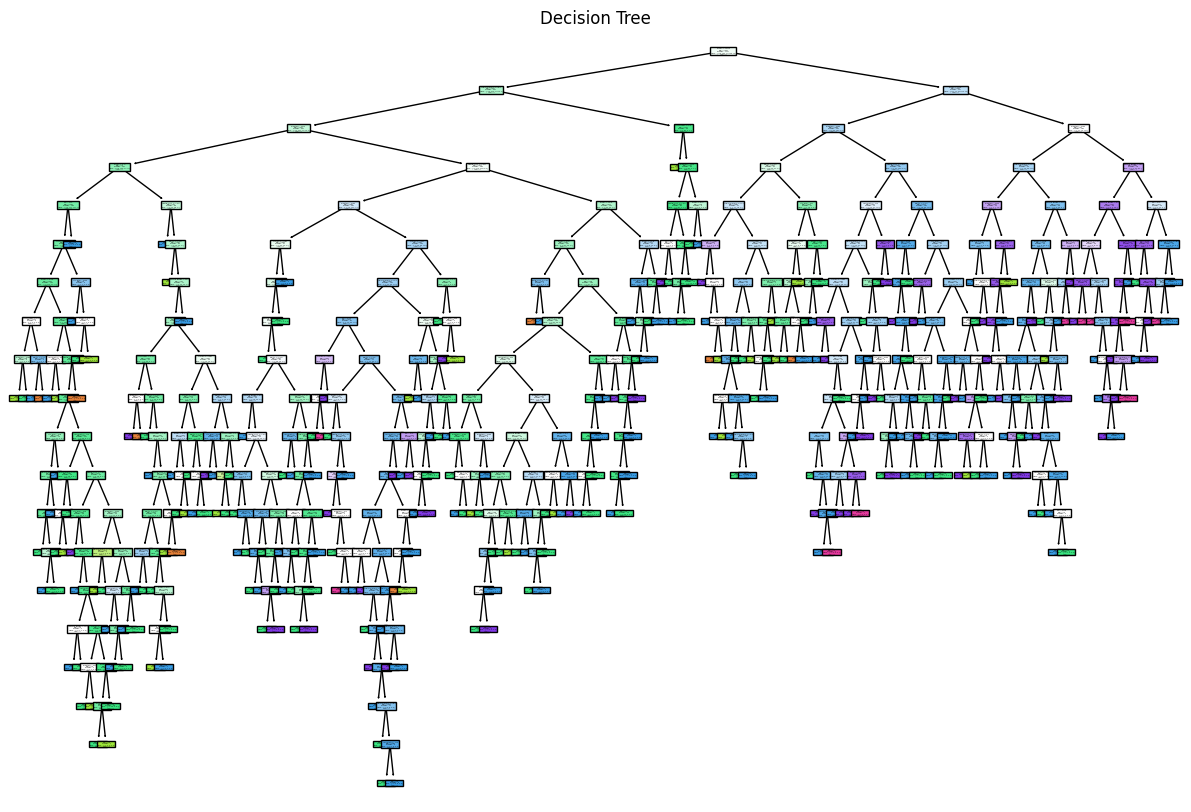

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True,feature_names=x.columns,class_names=['3','4','5','6','7','8'])
plt.title('Decision Tree')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

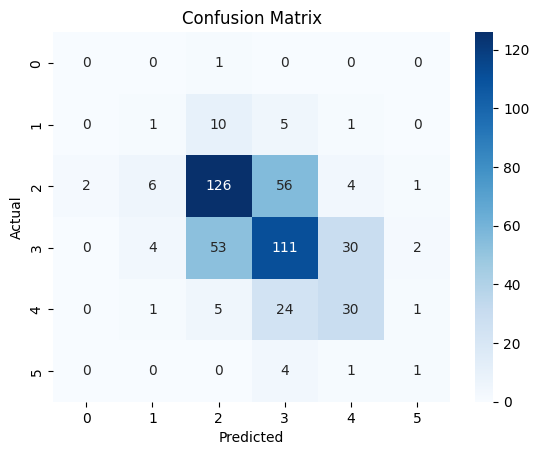

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show